In [2]:
# Step 1. Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2. Load data
df = pd.read_csv("snap_qc_data_2017to2023.csv", encoding = "latin1")

# Step 3. Keep only needed columns
keep_cols = ['State', 'Year', 'Error Nature']
df = df[keep_cols].copy()

# Step 4. Drop missing values & clean datatypes
df = df.dropna(subset=['State', 'Year', 'Error Nature'])
df['Year'] = df['Year'].astype(int)

print("Cleaned data shape:", df.shape)
print(df.head())



Cleaned data shape: (59457, 3)
         State  Year                                       Error Nature
0  Connecticut  2017  More income received from this source than bud...
1  Connecticut  2017   Deduction that should have been included was not
3  Connecticut  2017  More income received from this source than bud...
8  Connecticut  2017       Deduction included that should not have been
9  Connecticut  2017       Deduction included that should not have been


In [18]:
def plot_state_error_nature_trend(state_name, df):
    
    # filter the data for certain state
    state_df = df[df['State'] == state_name].copy()
    if state_df.empty:
        print(f"No data found for state: {state_name}")
        return

    # aggregate by year × error element
    agg = state_df.groupby(['Year', 'Error Nature']).size().reset_index(name='count')


    # order the legend
    last_year = df['Year'].max()
    order = (
        agg[agg['Year'] == last_year]
        .sort_values('count', ascending=False)
        ['Error Nature']
        .tolist()
    )

    # draw the plot
    plt.figure(figsize=(12, 6))
    palette = sns.color_palette("husl", len(order))

    for i, nat in enumerate(order):
        sub = agg[agg['Error Nature'] == nat]
        years = sub['Year'].values
        counts = sub['count'].values

        for j in range(1, len(years)):
            if not np.isnan(counts[j-1]) and not np.isnan(counts[j]):
                plt.plot(years[j-1:j+1], counts[j-1:j+1],
                         color=palette[i], linewidth=1.6)
        # note the last year on the graph
        if not np.isnan(counts[-1]):
            plt.text(years[-1] + 0.1, counts[-1],
                     nat if i < 5 else "",  # only for the Top5
                     fontsize=8, color=palette[i], va='center')

        # draw the points
        plt.scatter(years, counts, s=15, color=palette[i])

    plt.title(f"{state_name}: Error Nature Trends ({df['Year'].min()}–{df['Year'].max()})")
    plt.xlabel("Year")
    plt.ylabel("Number of Errors")
    plt.legend(order, title=f"Error Nature (sorted by {last_year} count)", fontsize=7, 
               bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # output the Top 5 natures
    print(f"\nTop 5 Error Natures in {state_name} (year {last_year}):")
    top5 = (
        agg[agg['Year'] == last_year]
        .sort_values('count', ascending=False)
        .head(5)
    )
    print(top5[['Error Nature', 'count']])


C:\Users\27311\AppData\Local\Temp\ipykernel_19724\485172426.py:49: UserWarning: Glyph 128 (\x80) missing from current font.
  plt.tight_layout()
C:\Users\27311\AppData\Local\Temp\ipykernel_19724\485172426.py:49: UserWarning: Glyph 153 (\x99) missing from current font.
  plt.tight_layout()
D:\soft\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\soft\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


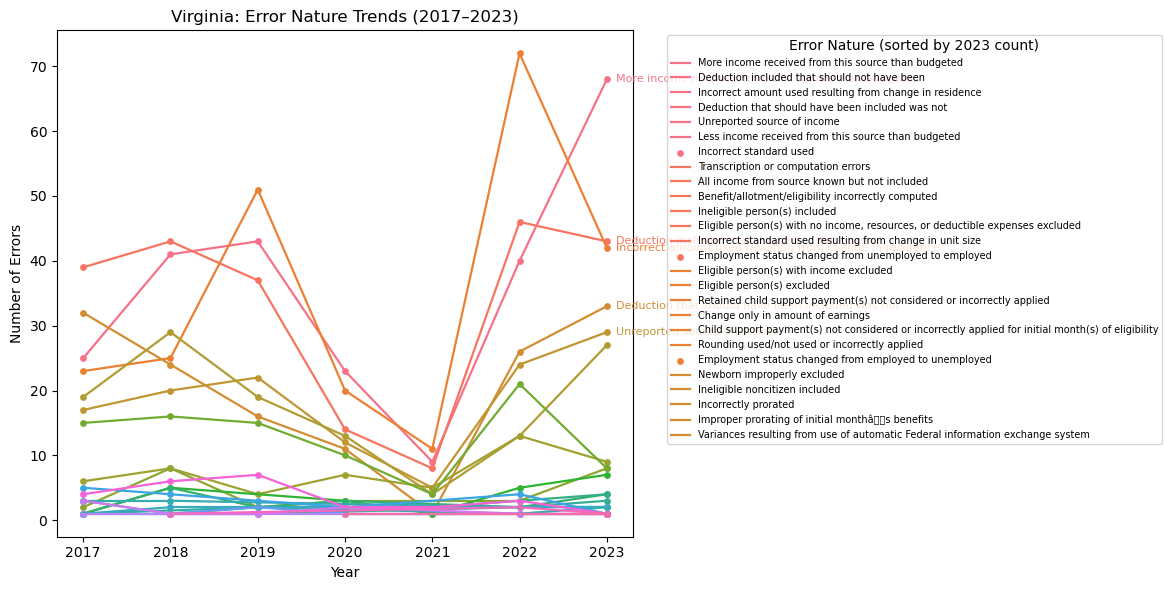


Top 5 Error Natures in Virginia (year 2023):
                                          Error Nature  count
141  More income received from this source than bud...     68
126       Deduction included that should not have been     43
134  Incorrect amount used resulting from change in...     42
127   Deduction that should have been included was not     33
146                        Unreported source of income     29


In [20]:
plot_state_error_nature_trend("Virginia", df)